# Capstone project proposal -- Covid-19 behavior

Since early April, Imperial College London and YouGov have been surveying people in 29 countries about their coronavirus-related behaviors and opinions. Topics include mask usage, self-isolation, working from home, vaccinations, and economic activity. The purpose of this project is to investigate whether/which kind of people's behavior would affect the spreading of COVID-19, and how people can better protect themselves and families.

The survey data is downloaded here: https://github.com/YouGov-Data/covid-19-tracker

Confirmed Covid-19 cases precentage by country: https://ourworldindata.org/covid-cases

### Step 1: download survey data for all the countries,  merge together and exported a copy of data

In [239]:
import numpy as np
import pandas as pd
import timeit

In [240]:
countries = pd.read_csv('incubator/covid19/countries.txt', header=None)

In [241]:
countrynames = countries.values

In [242]:
austrilia_data = pd.read_csv('incubator/covid19/australia.txt', index_col='RecordNo')

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [243]:
austrilia_data.columns[30:50]

Index(['i12_health_10', 'i12_health_11', 'i12_health_12', 'i12_health_13',
       'i12_health_14', 'i12_health_15', 'i12_health_16', 'i12_health_17',
       'i12_health_18', 'i12_health_19', 'i12_health_20', 'i13_health',
       'i14_health_1', 'i14_health_2', 'i14_health_3', 'i14_health_4',
       'i14_health_5', 'i14_health_6', 'i14_health_7', 'i14_health_8'],
      dtype='object')

In [244]:
austrilia_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11042 entries, 310 to 11351
Columns: 206 entries, endtime to m14_open
dtypes: float64(1), int64(5), object(200)
memory usage: 17.4+ MB


In [245]:
china_data = pd.read_csv('incubator/covid19/china.txt', index_col='RecordNo')

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [246]:
china_data.columns

Index(['endtime', 'qweek', 'i1_health', 'i2_health', 'i7a_health', 'i3_health',
       'i4_health', 'i5_health_1', 'i5_health_2', 'i5_health_3',
       ...
       'm14_5', 'm14_6', 'm14_7', 'm14_8', 'm14_9', 'm14_10', 'm14_11',
       'm14_96', 'm14_99', 'm14_open'],
      dtype='object', length=209)

In [247]:
china_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11015 entries, 0 to 11014
Columns: 209 entries, endtime to m14_open
dtypes: float64(1), int64(5), object(203)
memory usage: 17.6+ MB


In [248]:
t1 = pd.concat([austrilia_data, china_data, united_state_data], ignore_index=True, sort=False)
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33967 entries, 0 to 33966
Columns: 214 entries, endtime to employment_status_7
dtypes: float64(1), int64(5), object(208)
memory usage: 55.5+ MB


In [249]:
country_data = []
for i in range(len(countrynames)):
    country = countrynames[i]
    filename = country[0]+'.txt'
    print(filename)
    if country == 'sweden':
        data = pd.read_csv('incubator/covid19/'+filename, index_col='record')
    else: 
        data = pd.read_csv('incubator/covid19/'+filename, index_col='RecordNo')
    data['country']= pd.Series([country[0]]*data.shape[0])
    country_data.append(data)


australia.txt
brazil.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (79,104) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


canada.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


china.txt
denmark.txt
finland.txt
france.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,41,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


germany.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,41,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


hong-kong.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (78,89) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


india.txt
indonesia.txt
italy.txt
japan.txt
malaysia.txt
mexico.txt
netherlands.txt
norway.txt
philippines.txt
saudi-arabia.txt
singapore.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


south-korea.txt
spain.txt
sweden.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (103) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


taiwan.txt
thailand.txt
united-arab-emirates.txt
united-kingdom.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (82,87,89) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


united-states.txt
vietnam.txt


In [250]:
all_data = pd.concat(country_data, ignore_index=True, sort=False)

In [251]:
all_data.to_csv('incubator/covid19/all_data_merge.csv')

### Step 2: select some countries with high volume of Covid-19 cases, compare the response with data from all the survey counties

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

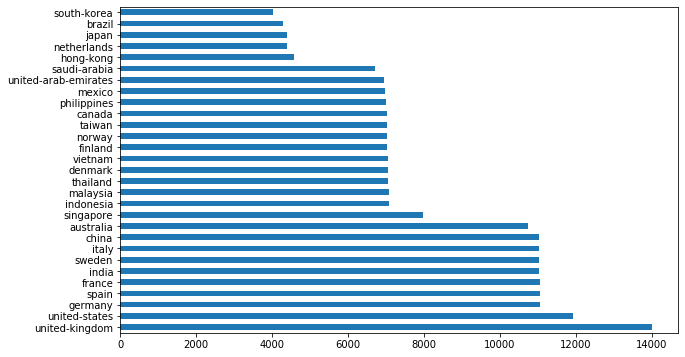

In [345]:
all_data['country'].value_counts()
all_data['country'].value_counts().plot(kind='barh', figsize=(10,6))

In [346]:
top_country =['united-state', 'brazil', 'singapore', 'sweden', 'saudi-arabia', 'united-arab-emirates', 'spain', 
              'united-kingdom', 'italy', 'neitherland', 'canada', 'france', 'germany', 'denmark','mexico', 'norway', 
              'finland', 'india', 'philippines', 'australia','indonesia','malaysia', 'south-korea','japan', 'china',
              'taiwan', 'vietnam']

In [255]:
us_data = all_data[all_data['country']=='united-states']
uk_data = all_data[all_data['country']=='united-kindom']
china_data = all_data[all_data['country']=='china']
top_data = all_data.loc[all_data['country'].apply(lambda x: x in top_country)]

#### Q: how much confidence do you have in NHS to respond to Covid-19 outbreak

In [256]:
all_data['WCRex1'].value_counts()

                  114199
Somewhat well      34397
Very well          20645
Somewhat badly     13974
Very badly         12025
Don't know          5315
Name: WCRex1, dtype: int64

Text(0.5, 1.0, 'US data')

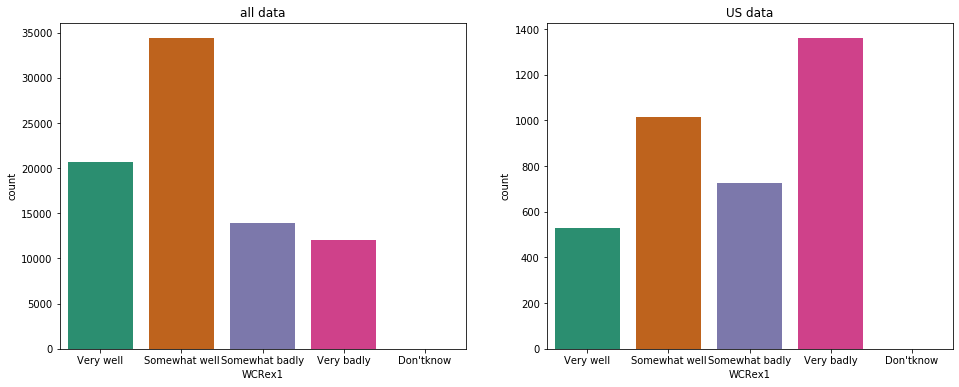

In [257]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['Very well', 'Somewhat well', 'Somewhat badly', 'Very badly', "Don'tknow"]
sns.countplot(x='WCRex1', data = all_data, order = order, palette = 'Dark2', ax = ax[0])
sns.countplot(x='WCRex1', data = us_data, order = order, palette = 'Dark2', ax = ax[1])
ax[0].set_title('all data')
ax[1].set_title('US data')

#### Q: little interests in doing things?

Text(0.5, 1.0, 'US data')

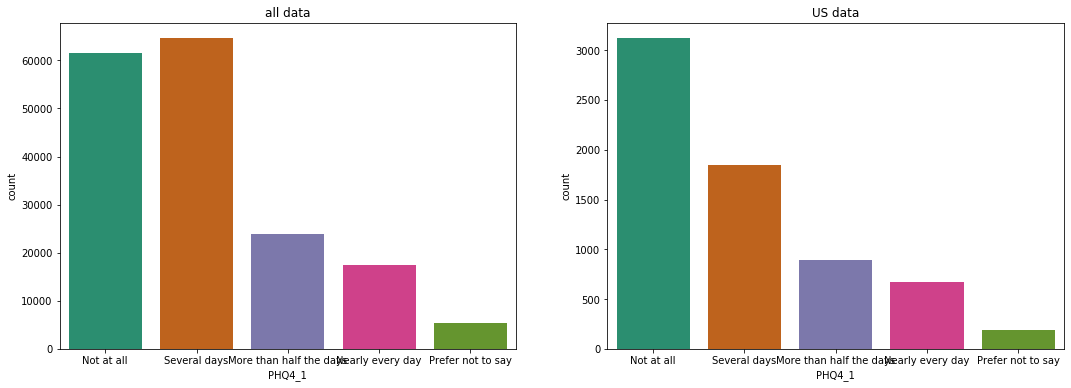

In [238]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['Not at all', 'Several days', 'More than half the days', 'Nearly every day', 'Prefer not to say']
sns.countplot(x='PHQ4_1', data = all_data, order = order, palette = 'Dark2', ax = ax[0])
sns.countplot(x='PHQ4_1', data = us_data, order = order, palette = 'Dark2', ax = ax[1])
ax[0].set_title('all data')
ax[1].set_title('US data')

#### Q: You government advsing wearing a mask(attribute: m1_1)

Text(0.5, 1.0, 'US data')

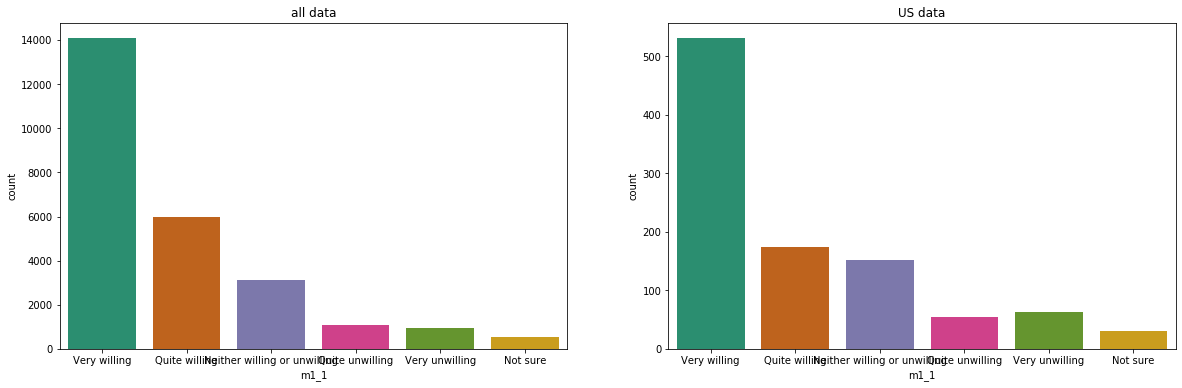

In [265]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['Very willing', 'Quite willing', 'Neither willing or unwilling', 'Quite unwilling', 'Very unwilling', 'Not sure']
sns.countplot(x='m1_1', data = all_data, order = order, palette = 'Dark2', ax = ax[0])
#sns.countplot(x='m1_1', data = all_data[all_data['country']=='united-kingdom'], order = order, palette = 'Dark2', ax = ax[0])
sns.countplot(x='m1_1', data = us_data, order = order, palette = 'Dark2', ax = ax[1])
ax[0].set_title('all data')
ax[1].set_title('US data')

#### Q: how many days did you wear a face mask or covering

In [330]:
all_data['m3'].value_counts().sort_values()

4      4072
6      4650
1      6743
3      6898
5      7996
2      8468
7     13778
0     16899
     154547
Name: m3, dtype: int64

Text(0.5, 1.0, 'US data')

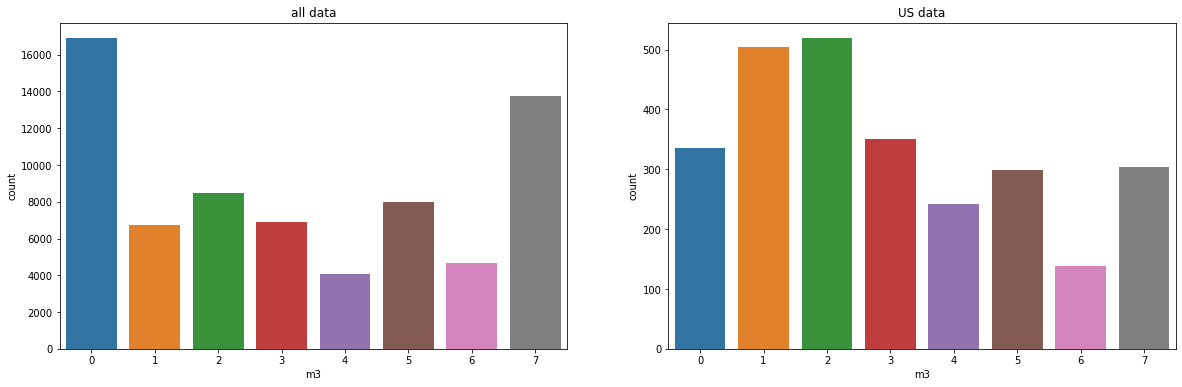

In [342]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['0','1','2','3','4','5','6','7']
sns.countplot(x='m3', data = all_data, order = order, ax = ax[0])
#sns.countplot(x='m1_1', data = all_data[all_data['country']=='united-kingdom'], order = order, palette = 'Dark2', ax = ax[0])
sns.countplot(x='m3', data = us_data, order = order, ax = ax[1])
ax[0].set_title('all data')
ax[1].set_title('US data')

No handles with labels found to put in legend.


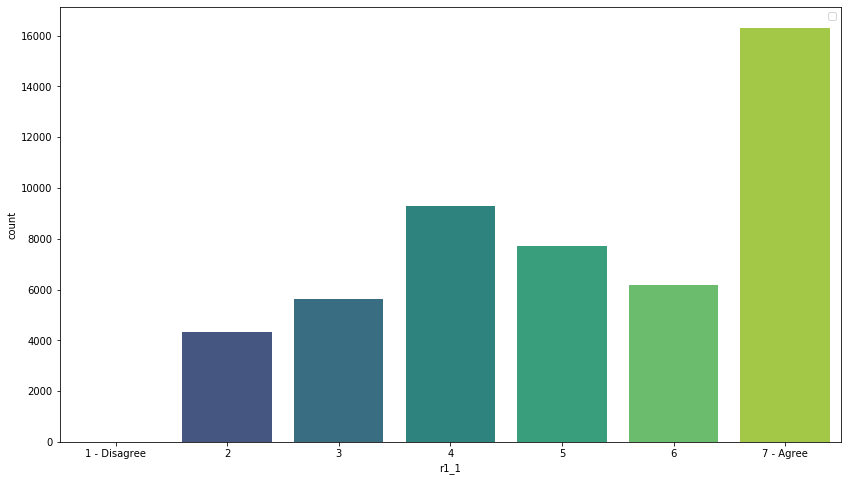

In [317]:
plt.figure(figsize=(14,8))
order=['1 - Disagree','2','3','4','5','6','7 - Agree']
us_data = all_data[all_data['country']=='united-states']
sns.countplot(x='r1_1', data = all_data, order = order,  palette = 'viridis')
plt.legend(loc='best', bbox_to_anchor = (1,1))